# Деревья решений

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

## Популярные алгоритмы построения дерева
 
  * See5/C5.0 [Quinlan et., 1997]  ← C4.5 [Quinlan, 1993]  ← ID3 [Quinlan, 1979]  ← CLS [Hunt & Marin & Stone & 1966] 
  * Classification and Regression Trees [Breiman & Friedman & Olshen & Stone, 1984]  ← CHAID [Kass, 1980]  ← THAID [Morgan & Messenger 1973]  ← AID [Morgan & Sonquist, 1963]

– это жадные рекурсивные алгоритмы, на каждом шаге разбивающие очередной ящик, чтобы добиться максимального уменьшения 
взвешенной _неоднородности_

## Плюсы и минусы деревьев решений

**Некоторые плюсы**

* Возможность интерпретации построенного решающего правила
* Не нуждается в большой подготовке данных
* Возможно протестировать модель с помощью статистических тестов
* Возможность определения значимости признаков
* Нечувствительность к монотонным преобразованиям входных переменных
* Поддерживают работу с входными переменными разных (смешанных) типов
* Достаточно устойчивы к выбросам


**Некоторые минусы**

* Можно легко создать слишком сложные деревья, которые слишком хорошо описывают выборку и плохо генерализуют проблему (переобучение)
* NP-complete проблема поиска оптимального дерева. На практике используют "жадные" алгоритмы
* Некоторые данные невозможно правильно интерпретировать с помощью деревьев решений (_например_ XOR)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Ирисы Фишера

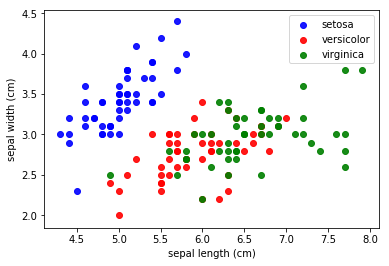

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
y_names = iris.target_names
feature_names = iris.feature_names

j1 = 0
j2 = 1

plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

plt.legend(loc = 'best')

In [4]:
X = X[:, [j1, j2]]

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
tree.export_graphviz(tree_model, out_file = 'iris_tree.dot', feature_names = [feature_names[j1], feature_names[j2]])   
!dot -Tpng iris_tree.dot -o iris_tree.png

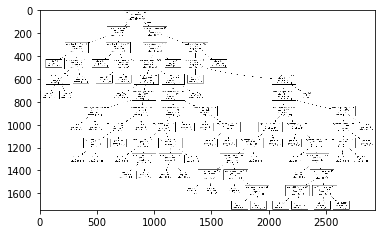

In [9]:
from scipy import misc
i = misc.imread('iris_tree.png')
plt.imshow(i)

### Наши данные

In [10]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

#### Разбиение на обучающую и тестовую выборки

In [48]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
intY_test = pd.Series([0 if val is 'C1' else 1 for val in Y_test])
print(N_train, N_test)

87 88


#### Инициализация

In [58]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

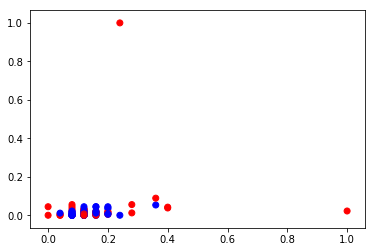

In [59]:
vX = X_train.values
colors = np.array(['b', 'r'])[intY]
plt.scatter(vX[:, 0], vX[:, 1], color = colors)

#### Ошибки

In [60]:
Y_train_pred = tree_model.predict(X_train)
Y_test_pred = tree_model.predict(X_test)

print(np.mean(Y_train_pred != Y_train))
print(np.mean(Y_test_pred != Y_test))

0.0
0.488636363636


#### Визуализация

In [61]:
tree.export_graphviz(tree_model, out_file = 'armenian_pubs_tree.dot', feature_names=X.columns)   
!dot -Tpng armenian_pubs_tree.dot -o armenian_pubs_tree.png

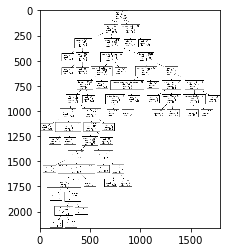

In [62]:
i = misc.imread('armenian_pubs_tree.png')
plt.imshow(i)

## Подбор параметров

In [63]:
from sklearn.model_selection import GridSearchCV
depth_array = np.arange(1, 25)
tree_model = tree.DecisionTreeClassifier()
grid = GridSearchCV(tree_model, param_grid = {'max_depth': depth_array}, cv = 5)
grid.fit(X_train, Y_train)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.max_depth
print(min_err_cv)
print(argmin_err_cv)

0.390804597701
20


In [64]:
err_cv  = 1-np.array([x[1] for x in grid.grid_scores_])
err_std = map(np.std, [x[2] for x in grid.grid_scores_])
# plt.errorbar(np.arange(1, 25), err_cv, yerr = err_std)
# plt.axhline(y = min_err_cv + err_std[argmin_err_cv - 1], color = 'gray')

/home/abay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/abay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [65]:
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(Y_test_pred, Y_test)
print(CF)

[[27 24]
 [19 18]]


### ROC-кривая

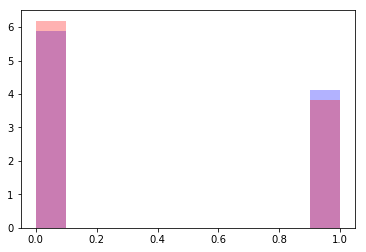

In [66]:
from sklearn.metrics import roc_curve
tree_model.fit(X_train, Y_train)
proba = tree_model.predict_proba(X_test)[:, 1]

plt.hist(proba[intY_test == 0], color = 'b', alpha = 0.3, normed = True)
plt.hist(proba[intY_test == 1], color = 'r', alpha = 0.3, normed = True)
pass

[-0.05, 1.05, -0.05, 1.05]

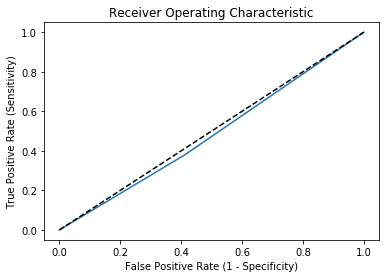

In [67]:
fpr, tpr, thresholds = roc_curve(intY_test, proba)
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])

#### Area Under Curve

In [68]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.48395445134575565

### Значимость признаков

In [69]:
importances = tree_model.feature_importances_
indices = np.argsort(importances)[:-11:-1]
names = X.columns
print("Feature ranking:")

for f in range(10):
    print("%2d. feature '%5s' (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'income' (0.254902)
 2. feature '  age' (0.214498)
 3. feature 'sec_imp_Music' (0.133497)
 4. feature 'lifestyle_Rock_punk' (0.051076)
 5. feature 'lifestyle_Busy' (0.045166)
 6. feature 'lifestyle_Sport' (0.041605)
 7. feature 'occupation_Student' (0.040049)
 8. feature 'freq_rarely' (0.037739)
 9. feature 'occasions_Hang_outs_with_friends' (0.037379)
10. feature 'prim_imp_Pricing' (0.030037)


(-1, 10)

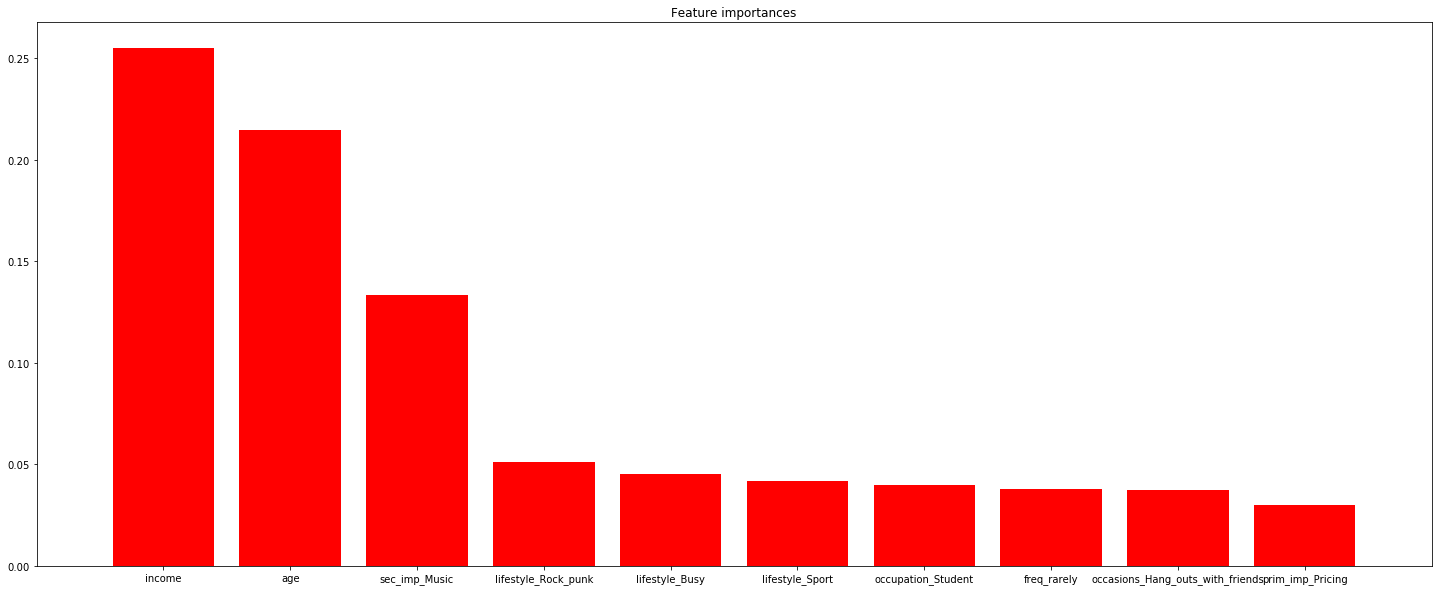

In [86]:
plt.figure(figsize=(25,10))
plt.title("Feature importances")
plt.bar(range(10), importances[indices], align = 'center', color = 'r')
plt.xticks(range(10), np.array(names)[indices])
plt.xlim([-1, 10])